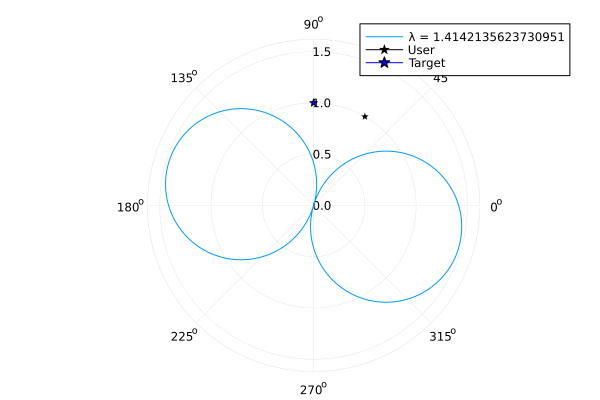

In [9]:
using Plots

# Generate angles for polar plot
θ = 0:0.01:2π  # 0 to 360 degrees in radians

# Define beam patterns for different λ values
# λ_values = [0, 0.48, 0.5, 0.52, 1]
λ_values = [√2]
beam_patterns = [cos.(θ) .* λ + sin.(θ) .* (1 - λ) for λ in λ_values]

# Plot styles
line_styles = [:solid, :dash, :dashdot, :dot, :solid]

# Create polar plot
plot(proj=:polar)

# Add beam patterns using a for loop (compact and correct)
for (i, λ) in enumerate(λ_values)
    plot!(θ, abs.(beam_patterns[i]), label="λ = $λ", linestyle=line_styles[i])
end

# Add markers for User and Target points
plot!([deg2rad(60)], [1], label="User", marker=:star5, color=:black)  # User point
plot!([deg2rad(90)], [1], label="Target", marker=:star5, color=:blue)  # Target point

# Add legend
plot!(legend=:topright)

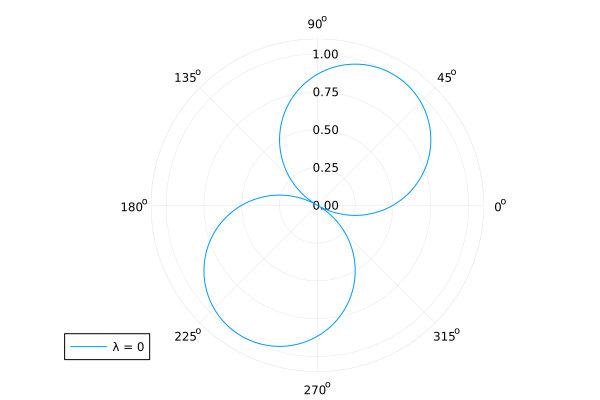

In [11]:
using Plots

# Define parameters
θ = 0:0.01:2π  # Angles in radians
θ_c = deg2rad(60)  # Beam peak direction

# Beam pattern function for λ = 0
beam_pattern = abs.(cos.(θ .- θ_c))  # Use broadcasting with .- for element-wise operation

# Create polar plot
plot(θ, beam_pattern, proj=:polar, label="λ = 0")

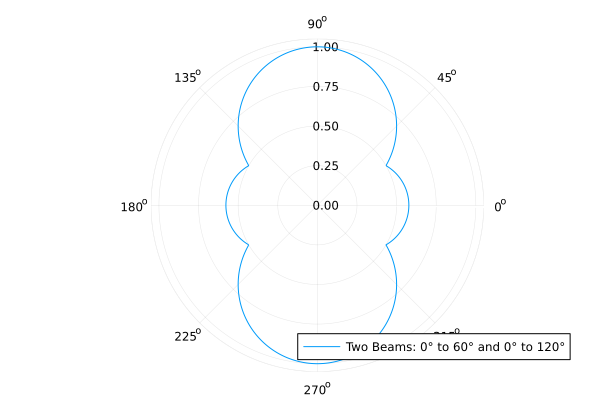

In [13]:
using Plots

# Define parameters
θ = 0:0.01:2π  # Angles in radians
θ1 = deg2rad(60)  # Beam direction for the first lobe
θ2 = deg2rad(120)  # Beam direction for the second lobe

# Beam pattern function
beam_pattern = abs.(cos.(θ .- θ1)) .+ abs.(cos.(θ .- θ2))  # Two beams spanning 0 to 60 and 0 to 120

# Normalize the pattern to scale between 0 and 1
beam_pattern = beam_pattern ./ maximum(beam_pattern)

# Create polar plot
plot(θ, beam_pattern, proj=:polar, label="Two Beams: 0° to 60° and 0° to 120°")

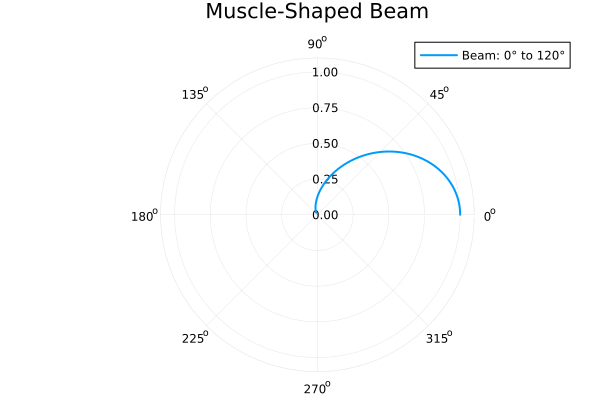

In [15]:
using Plots

# Define parameters
θ = 0:0.01:deg2rad(120)  # Angles in radians (0° to 120°)
n = 6  # Power parameter to control sharpness and elongation

# Beam pattern function
beam_pattern = abs.(cos.(θ ./ 2)).^n  # Muscle-shaped beam with elongation

# Normalize the pattern to scale between 0 and 1
beam_pattern = beam_pattern ./ maximum(beam_pattern)

# Create polar plot
plot(θ, beam_pattern, proj=:polar, linewidth=2, label="Beam: 0° to 120°")

# Add labels
title!("Muscle-Shaped Beam")

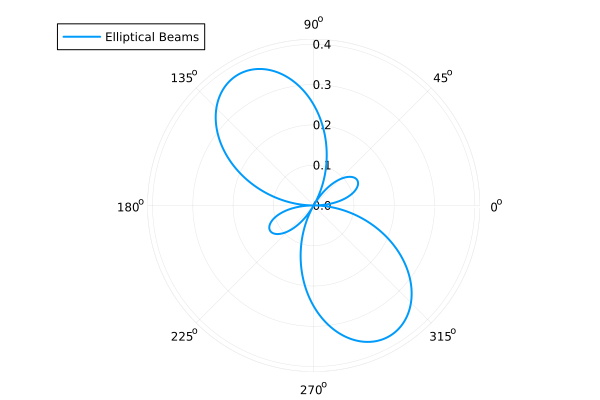

In [28]:
using Plots

# Define parameters
θ = 0:0.01:2π  # Angles in radians
θ_c = deg2rad(60)  # Beam peak direction

# Beam pattern function for λ = 0 (adjust for ellipses)
a = 0.5  # Semi-major axis of the ellipse
b = -0.5  # Semi-minor axis of the ellipse
beam_pattern = abs.(sin.(θ .- θ_c))  # Directional pattern
ellipse_pattern = a .* beam_pattern .* abs.(sin.(θ)) # .+ b .* beam_pattern .* abs.(sin.(θ))

# Create polar plot
plot(θ, ellipse_pattern, proj=:polar, label="Elliptical Beams", linewidth=2)